In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("gene_data.csv", header = 0, index_col = 0)
data = data.T
X = np.log(data+1)
X


Name,CALML3,PIK3R2,IL11RA,BAMBI,PLA2G10,ETV1,POLD4,NFKBIZ,SMAD2,IFNG,...,VPS33B,MRPS5,NUBP1,CNOT4,COG7,CC2D1B,GPATCH3,ZNF143,EDC3,TTC31
SO11-2366_LG,2.890372,6.643790,5.332719,5.010635,2.708050,3.295837,6.527958,6.837333,7.149917,1.945910,...,5.736572,6.563856,4.290459,6.214608,6.324359,3.828641,3.663562,4.736198,6.565265,5.758902
SO11-463_LG,2.302585,6.643790,5.476464,5.351858,5.963579,3.871201,6.979145,6.442540,6.638568,2.639057,...,5.147494,5.998937,3.988984,5.746203,6.222576,3.806662,4.262680,4.521789,6.066108,5.365976
SO11-5496_LG,2.079442,6.626718,4.615121,4.882802,2.197225,6.003887,6.180017,5.117994,6.894670,2.197225,...,5.549076,6.562444,4.454347,6.089045,6.318968,3.610918,3.258097,4.727388,6.466145,5.220356
SO12-5870_LG,2.564949,6.994850,5.811141,4.143135,6.232448,4.369448,6.899723,6.947937,6.917706,2.397895,...,5.411646,6.551080,4.624973,6.295266,6.752270,4.174387,4.369448,5.036953,6.556778,5.808142
SO13-4426_LG,2.639057,6.131226,5.572154,5.976351,3.663562,4.682131,6.643790,6.152733,6.720220,2.484907,...,5.129899,6.751101,4.430817,6.368187,6.040255,3.610918,3.688879,4.753590,5.736572,5.902633
SO13-5018_LG,3.367296,6.865891,5.517453,6.016157,6.548219,3.806662,7.265430,6.688355,6.846943,2.639057,...,5.564520,6.533789,4.615121,6.175867,6.687109,4.043051,4.382027,5.068904,6.445720,5.733341
SO15-3504_LG,2.397895,6.313548,5.476464,5.924256,3.951244,4.962845,6.122493,4.564348,7.186901,2.079442,...,5.298317,6.431331,4.406719,6.393591,6.373320,3.367296,3.583519,5.003946,6.289716,5.828946
SC13-2649_LG,2.484907,5.828946,4.521789,3.526361,4.060443,2.484907,5.780744,5.634790,5.720312,1.791759,...,3.737670,4.532599,1.945910,4.025352,4.465908,3.091042,3.044522,3.178054,4.905275,4.189655
SC13-4067_LG,2.197225,6.575076,5.283204,5.129899,5.365976,4.094345,6.935370,6.642487,6.690842,1.791759,...,5.075174,6.008813,4.317488,5.894403,6.109248,3.713572,3.784190,4.634729,5.945421,5.451038
SC14-1890_LG,2.397895,6.478510,5.323010,4.290459,6.517671,3.496508,6.700731,6.603944,6.498282,2.079442,...,5.214936,6.335054,4.779123,6.242223,6.408529,4.060443,4.143135,4.997212,6.295266,5.564520


In [3]:
y = np.array( [ 0 if d.split('_')[1] == 'LG' else 1 for d in data.index ] )
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

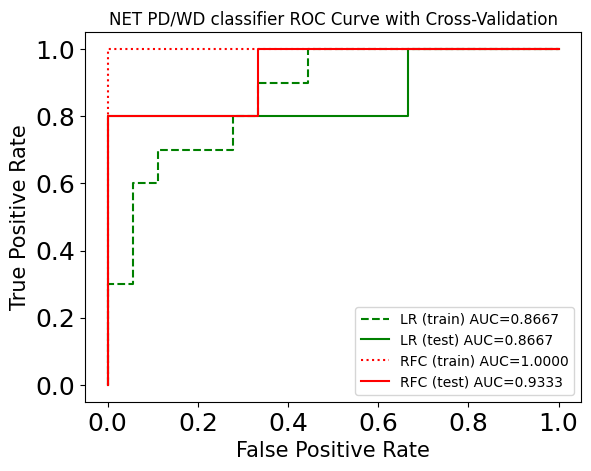

In [4]:
import sys

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import roc_curve

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)


X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=13)

logreg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter = 100)
logreg.fit(X_train, y_train)

y_probs = cross_val_predict(logreg, X_train, y_train, method='predict_proba', cv=5 )
y_probs = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Plot the ROC curve for the training data as a dotted line
plt.plot(fpr, tpr, label='LR (train) AUC={:.4f}'.format(metrics.auc(fpr, tpr)), color='green', linestyle='dashed')
y_probs = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1])
plt.plot(fpr, tpr, label='LR (test) AUC={:.4f}'.format(metrics.auc(fpr, tpr)), color='green', linestyle='solid')

##### RFC

rfc =  RandomForestClassifier(n_estimators=100, random_state = 2)
rfc.fit(X_train, y_train)

y_probs = cross_val_predict(rfc, X_train, y_train, method='predict_proba', cv=5)
y_probs = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Plot the ROC curve for the training data as a dotted line
plt.plot(fpr, tpr, label='RFC (train) AUC={:.4f}'.format(metrics.auc(fpr, tpr)), color='red', linestyle='dotted')
y_probs = rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:,1])
plt.plot(fpr, tpr, label='RFC (test) AUC={:.4f}'.format(metrics.auc(fpr, tpr)), color='red', linestyle='solid')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('NET PD/WD classifier ROC Curve with Cross-Validation')
plt.legend()

plt.savefig("roc_curve_lr_rfc.png")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7310e912-e0e1-4816-bf70-77f205fc24c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>